# Exploratory data Analysis in Python

### 1. Importing the required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### 2. Loading the data into the data frame

* Download using kaggle datasets commands

In [2]:
#os.environ['KAGGLE_USERNAME'] = "Your UserName"
#os.environ['KAGGLE_KEY'] = "Your API KEY"
#!kaggle datasets download -d CooperUnion/cardataset

* Download Datasets using opendasets methods

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/CooperUnion/cardataset')
#unzipping the zip files and deleting the zip files
#%unzip \*.zip  && rm *.zip

Skipping, found downloaded files in ".\cardataset" (use force=True to force download)


In [4]:
# preparation - check the path
%pwd

'd:\\MachineLearning\\DATA\\ML-projects\\EDA_glossary_data_analysis'

In [5]:
df = pd.read_csv('cardataset/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### 3. Checking Data and its Data types

In [6]:
# Get row and column of dataframe
print(df.shape)

(11914, 16)


In [7]:
 # Check the general information of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
# Get the columns name
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


### 4. Dropping irrelevant columns

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.


In [9]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### 5. Renaming the columns
In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [10]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


+ Note: After checked by info(), head() tail() and sample() methods, it shows that there are NAN in several rows and columns.

### 4. Dropping the duplicate Rows

In [11]:
# check if there are duplicate row 
df.duplicated().sum()

989

In [12]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


* Now let us remove the duplicate data because it's ok to remove them.

In [13]:
df.count()      # Used to count the number of row

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [14]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [15]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

### 7. Checking the missing or null values.


In [16]:
df[df.isnull().any(axis=1)]

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
539,FIAT,500e,2015,NaN,0.0,DIRECT_DRIVE,front wheel drive,108,122,31800
540,FIAT,500e,2016,NaN,0.0,DIRECT_DRIVE,front wheel drive,103,121,31800
541,FIAT,500e,2017,NaN,0.0,DIRECT_DRIVE,front wheel drive,103,121,31800
1983,Chevrolet,Bolt EV,2017,200.0,NaN,DIRECT_DRIVE,front wheel drive,110,128,40905
1984,Chevrolet,Bolt EV,2017,200.0,NaN,DIRECT_DRIVE,front wheel drive,110,128,36620
...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,NaN,0.0,DIRECT_DRIVE,front wheel drive,92,120,35700
9851,Kia,Soul EV,2015,NaN,0.0,DIRECT_DRIVE,front wheel drive,92,120,33700
9852,Kia,Soul EV,2016,NaN,0.0,DIRECT_DRIVE,front wheel drive,92,120,33950
9853,Kia,Soul EV,2016,NaN,0.0,DIRECT_DRIVE,front wheel drive,92,120,31950


In [17]:
df.isnull().any(axis=0)

Make            False
Model           False
Year            False
HP               True
Cylinders        True
Transmission    False
Drive Mode      False
MPG-H           False
MPG-C           False
Price           False
dtype: bool

In [18]:
# Check missing Values by Column
# Check missing values in each feature
df.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

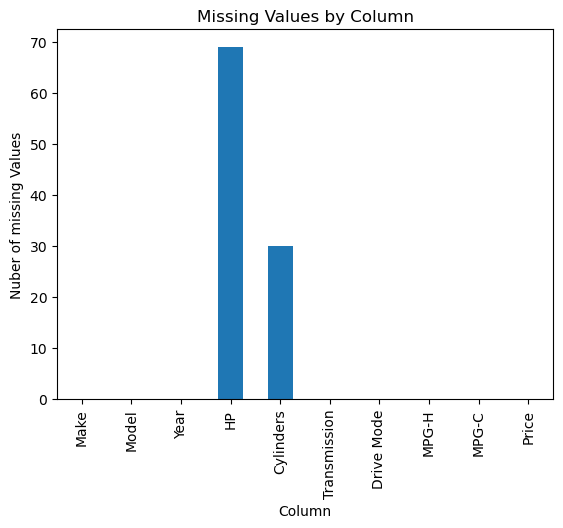

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel('Column')
ax.set_ylabel('Nuber of missing Values')
ax.set_title('Missing Values by Column')
num_of_nan = df.isnull().sum()
num_of_nan.plot(kind='bar');
#ax.axis('off')

* Note: Missing values are in columns HP and Cylinders.
These NA value will be deleted so as to accuratly asses the price distribution.

### 8. Handling the Missing Data


* There is a two way to handle the missing vaule. One is simplely drop the row which has nan value But, this is not a good approach to do so, becaue it could drop the important featuere too </ul>

In [20]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

* Second way is replace the missing value with its mean max min of that colunn 

In [21]:
## Engine_fuel_type

# handel missing data - replace values with modus
#df['Engine Fuel Type'].value_counts

In [22]:
# show the values represents the count of the occurrences of each unique values in engine_fuel_type column
#df.groupby(df['Engine Fuel Type'], dropna=False).size()

In [23]:
# Replace the NaN values with this most frequently occurring value.
# mode() function returns a Series containing the most frequently occurring value(s).
# [0] is used to get the first (most frequent) value from the Series.
#most_common_fuel_type = df['Engine Fuel Type'].mode()[0]
#df['Engine Fuel Type'].fillna(most_common_fuel_type, inplace = True)

In [24]:
## * Engine HP

# handel the missing data -- replace values with modus
df['HP'].value_counts

<bound method IndexOpsMixin.value_counts of 0        335.0
1        300.0
2        300.0
3        230.0
4        230.0
         ...  
11909    300.0
11910    300.0
11911    300.0
11912    300.0
11913    221.0
Name: HP, Length: 10827, dtype: float64>

In [25]:
# show the values represents the count of the occurrences of each unique values in Engine HP column
df.groupby(df['HP'], dropna=False).size()

HP
55.0      2
62.0      2
63.0      6
66.0      5
73.0      7
         ..
707.0     6
720.0     4
731.0     3
750.0     2
1001.0    3
Length: 355, dtype: int64

In [26]:
# Replace the NaN values with this most frequently occurring value.

most_common_engine_hp = df['HP'].mode()[0]
df['HP'].fillna(most_common_engine_hp, inplace = True)


In [27]:
## Engine Cylinders

# handel the missing data -- replace values with modus
df['Cylinders'].value_counts

<bound method IndexOpsMixin.value_counts of 0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
11909    6.0
11910    6.0
11911    6.0
11912    6.0
11913    6.0
Name: Cylinders, Length: 10827, dtype: float64>

In [28]:
# show the values represents the count of the occurrences of each unique values in Engine_Cylinders column
df.groupby(df['Cylinders'], dropna=False).size()

Cylinders
0.0       13
3.0       28
4.0     4227
5.0      159
6.0     4215
8.0     1889
10.0      65
12.0     228
16.0       3
dtype: int64

In [29]:
# Replace the NaN values with this most frequently occurring value.

most_common_cylinders = df['Cylinders'].mode()[0]
df['Cylinders'].fillna(most_common_cylinders, inplace = True)


In [30]:
# Check Missing Values by Column
df.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

* Note: There is no missing data in column

### 9. Handeling  Outliners


An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from [towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

<Axes: xlabel='Price'>

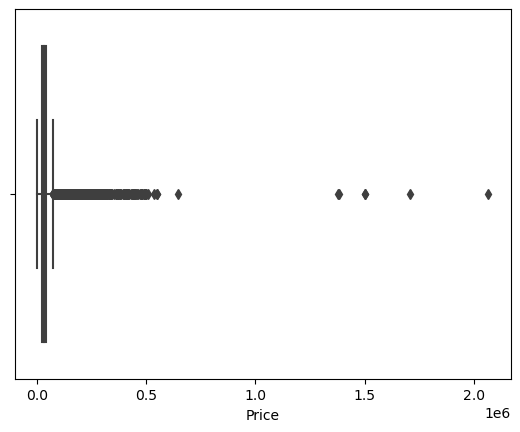

In [31]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

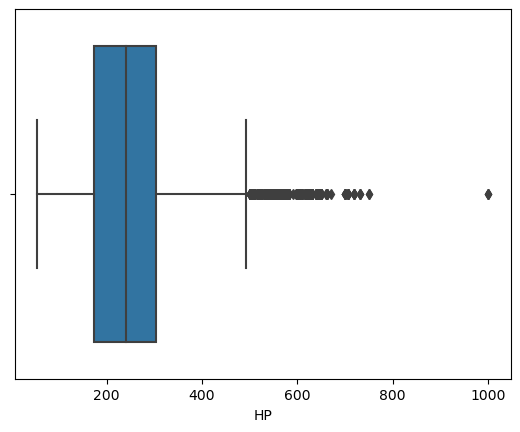

In [32]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

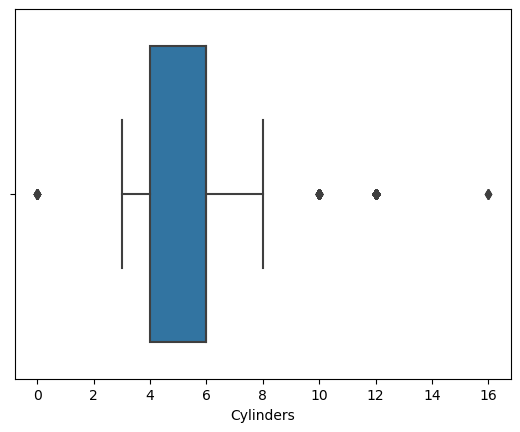

In [33]:
sns.boxplot(x=df['Cylinders'])

In [34]:
# assign variable for column in numeric type
numeric_column = ['HP', 'Cylinders',  'Price']

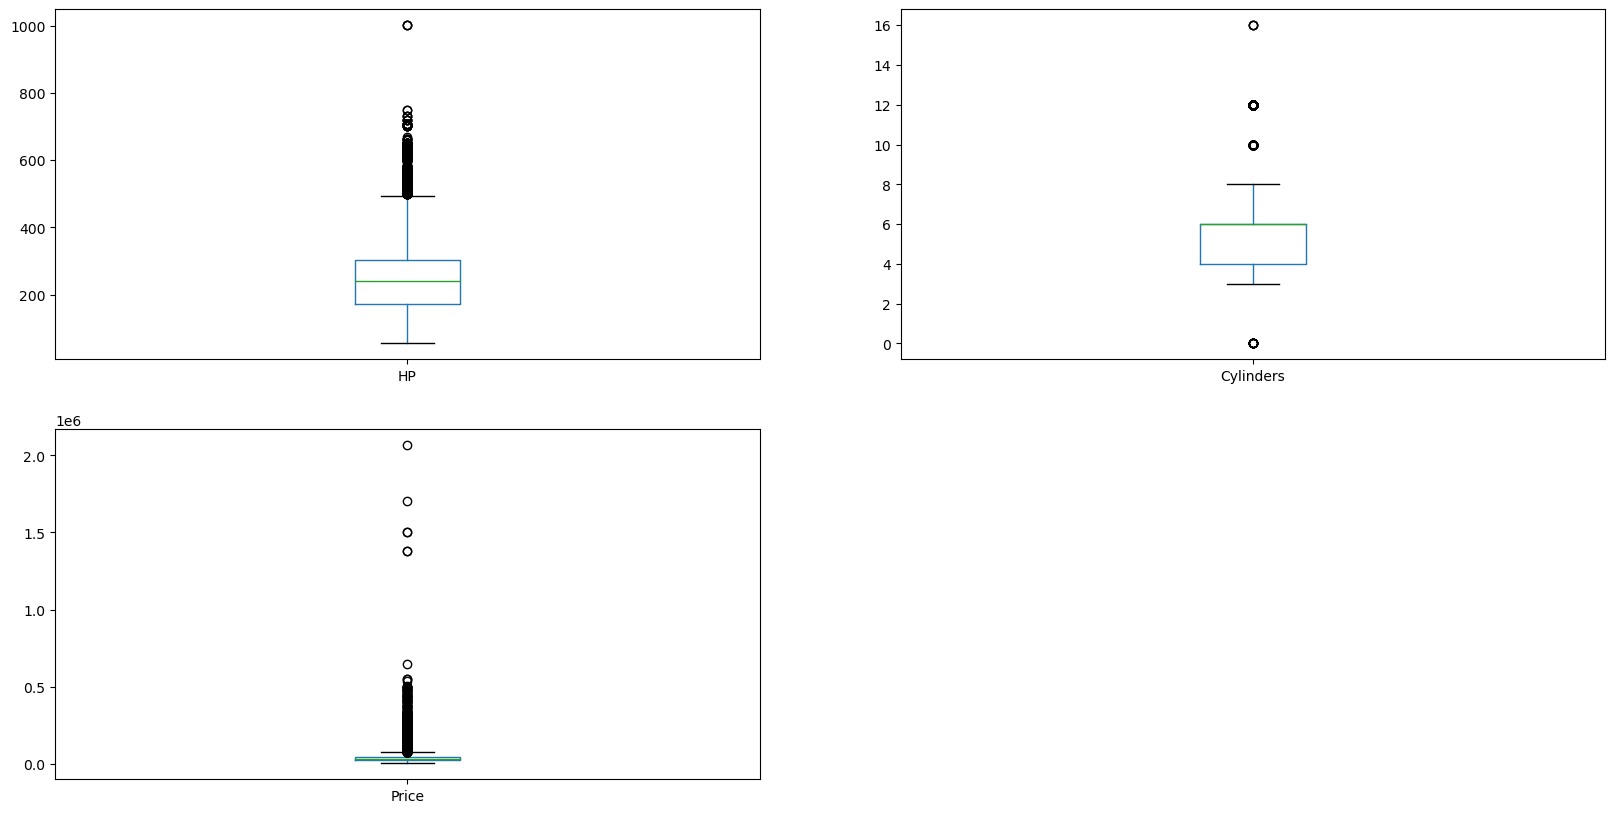

In [35]:

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))

for i,el in enumerate(numeric_column):
    a = df.boxplot(el, ax=axes.flatten()[i],grid=False)

fig.delaxes(axes[1][1])
plt.show()

In [36]:
# Calculate quartiles for numerical columns
Q1 = df.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = df.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR = Q3 - Q1
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)

Q1:
 Year          2007.0
HP             173.0
Cylinders        4.0
MPG-H           22.0
MPG-C           16.0
Price        21972.5
Name: 0.25, dtype: float64

Q3:
 Year          2016.0
HP             303.0
Cylinders        6.0
MPG-H           30.0
MPG-C           22.0
Price        43300.0
Name: 0.75, dtype: float64

IQR:
 Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


how to use this technique in order to remove the outliers.

In [37]:
df.dtypes

Make             object
Model            object
Year              int64
HP              float64
Cylinders       float64
Transmission     object
Drive Mode       object
MPG-H             int64
MPG-C             int64
Price             int64
dtype: object

* Note: we can see that in out dataframe there are differt types of datasets so that we are going to take only numeric_column to remove the outliers.

In [38]:
# Remove outliers based on IQR
df = df[~((df.select_dtypes(include=['float64', 'int64']) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include=['float64', 'int64']) > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the DataFrame after removing outliers
print(df.shape)

(9191, 10)


As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.


### 9. Plot different features against one another (scatter), against frequency (histogram)
#### Histogram

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.


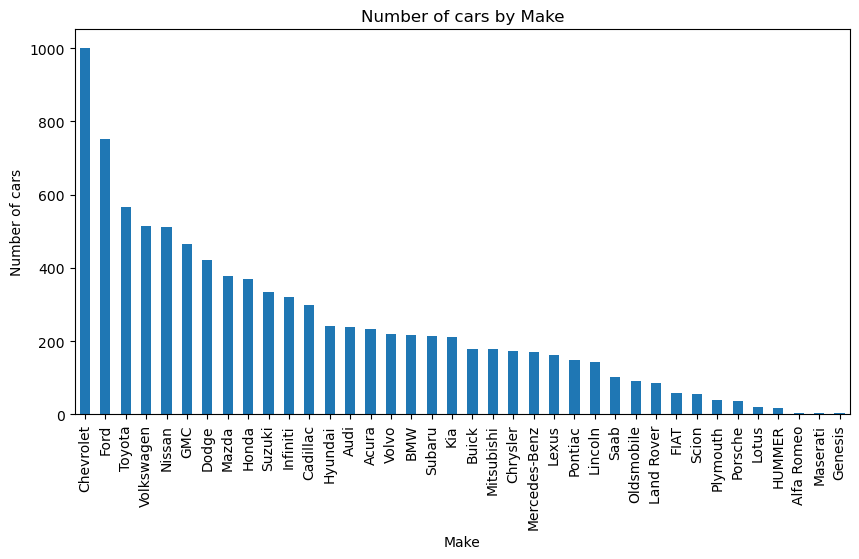

In [39]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Make")
plt.ylabel('Number of cars')
plt.xlabel('Make');


#### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.


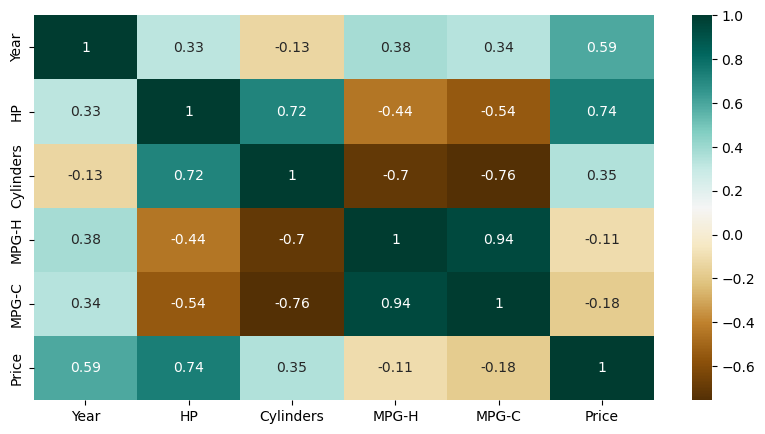

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 5))
c = numerical_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()


**Scatterplot**

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.


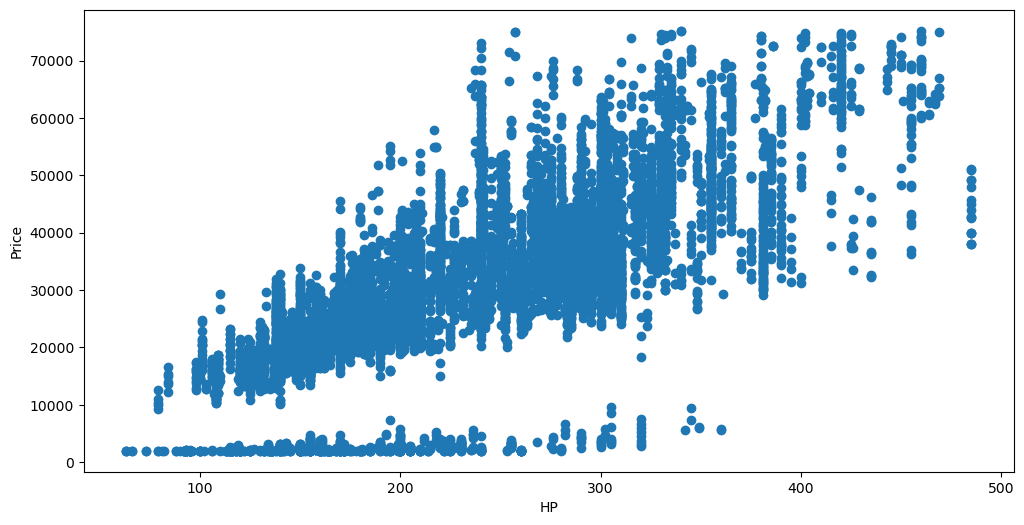

In [41]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()  

**These steps outlined above provide a foundational framework for conducting Exploratory Data Analysis (EDA). While they offer a solid starting point, it's essential to remember that EDA is a dynamic process tailored to the unique characteristics of each dataset. As you delve deeper into your data, you'll encounter additional techniques and approaches specific to your analysis objectives and the nature of the data at hand**